In [24]:
#pip install pydot
#pip install graphviz
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Concatenate
from keras import regularizers
input_shape = (64, 33) #modify
output_dim = 70
latent_dim = 128
lstm_dim = 128 

In [25]:
#encoder-decoder architecture
unroll = False
encoder_inputs = Input(shape=input_shape)
encoder = LSTM(lstm_dim, return_state=True,
                unroll=unroll)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
states = Concatenate(axis=-1)([state_h, state_c])
neck = Dense(latent_dim, activation="relu")
neck_outputs = neck(states)

In [26]:
decode_h = Dense(lstm_dim, activation="relu")
decode_c = Dense(lstm_dim, activation="relu")
state_h_decoded =  decode_h(neck_outputs)
state_c_decoded =  decode_c(neck_outputs)
encoder_states = [state_h_decoded, state_c_decoded]
decoder_inputs = Input(shape=input_shape)
decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll
                   )

In [27]:
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [28]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 33)]     0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 128),        82944       ['input_3[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                                  
 concatenate_1 (Concatenate)    (None, 256)          0           ['lstm_2[0][1]',                 
                                                                  'lstm_2[0][2]']           

In [29]:
model.layers[6].weights

[<tf.Variable 'dense_6/kernel:0' shape=(128, 128) dtype=float32, numpy=
 array([[-0.04193308,  0.0636842 ,  0.03326723, ...,  0.01931648,
          0.08388515,  0.02801214],
        [ 0.01266719, -0.09901305,  0.13309361, ..., -0.00530177,
         -0.00959632,  0.03047712],
        [-0.00898665,  0.10681961, -0.02164271, ..., -0.0733714 ,
         -0.08491804,  0.00510894],
        ...,
        [-0.01180461,  0.14146818,  0.05507083, ...,  0.05167964,
          0.00508499,  0.13640346],
        [-0.14482398, -0.02825539,  0.11963193, ...,  0.14917491,
          0.10905088, -0.0351655 ],
        [-0.1344304 , -0.13788894,  0.13554583, ...,  0.11108027,
          0.04881206, -0.12101316]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [30]:
from tensorflow.keras.utils import plot_model

In [31]:
#pip install pydot

In [32]:
#pip install graphviz

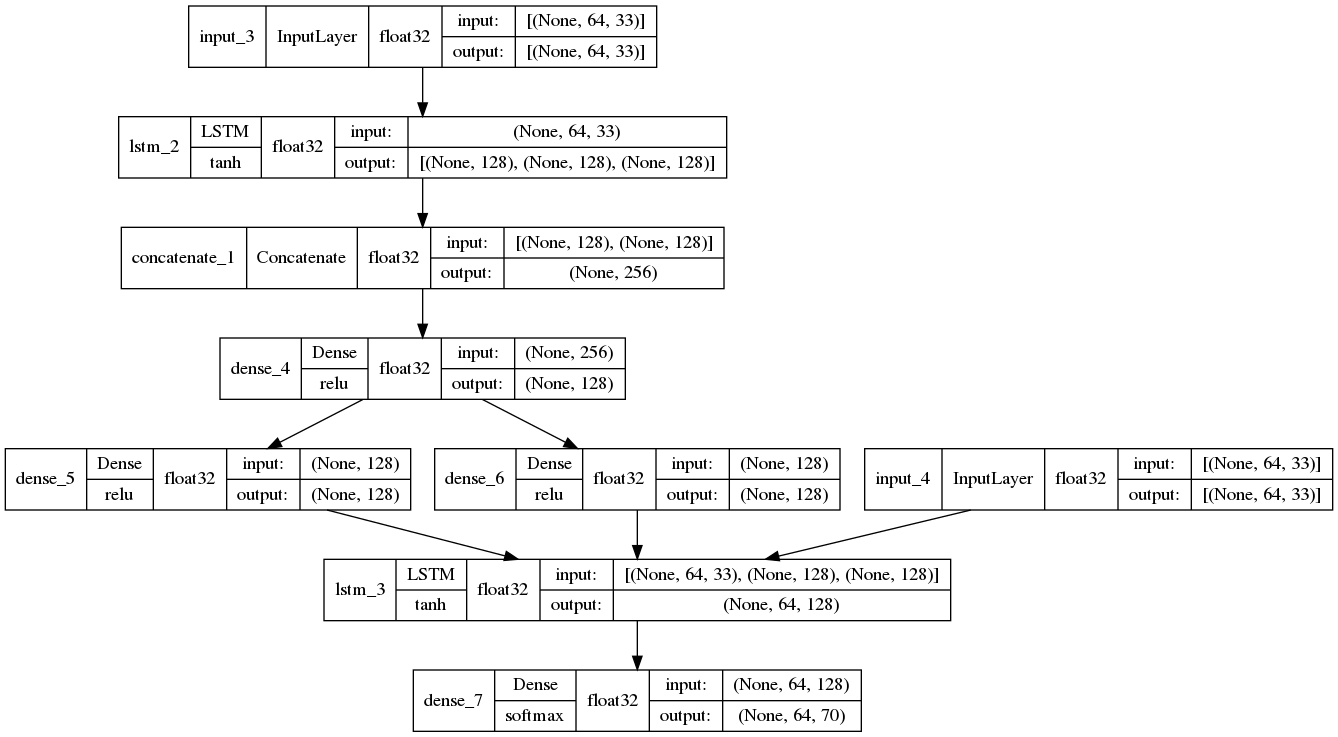

In [33]:
plot_model(model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

In [34]:
from tensorflow import keras

In [35]:
smiles_to_latent_model = keras.models.load_model('mol_seq2lat_ZINC.h5')

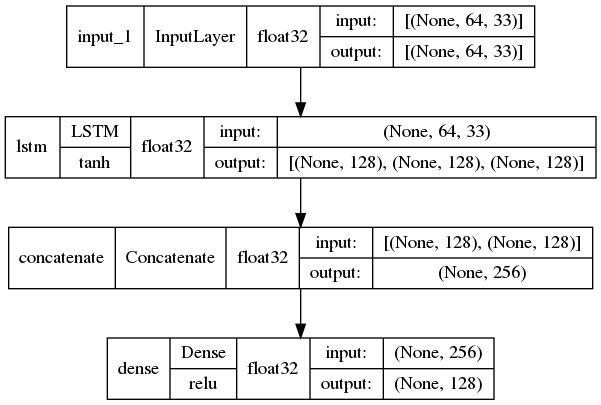

In [36]:
plot_model(smiles_to_latent_model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

In [37]:
latent_to_states_model = keras.models.load_model("lat2state_ZINC.h5")

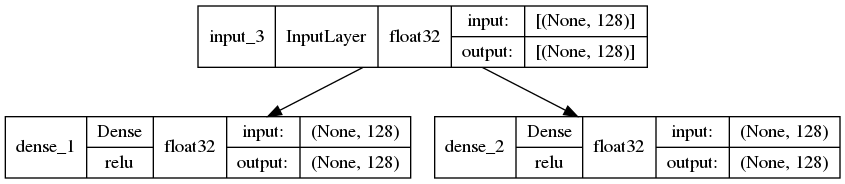

In [38]:
plot_model(latent_to_states_model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

In [39]:
sample_model = keras.models.load_model("samplemodel_ZINC.h5")

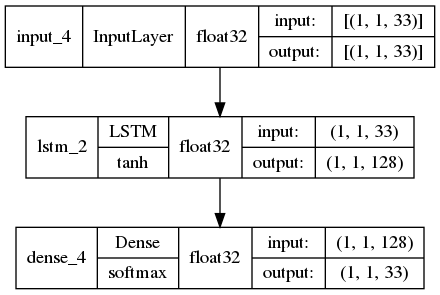

In [40]:
plot_model(sample_model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

In [41]:
import pandas as pd

In [42]:
history__ = pd.read_pickle('Blog_history_ZINC_SELFIES.pickle')

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline

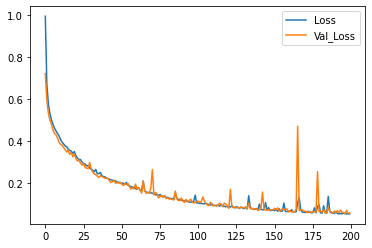

In [44]:
plt.plot(history__["loss"], label="Loss")
plt.plot(history__["val_loss"], label="Val_Loss")
#plt.yscale("log")
plt.legend()

In [45]:
history__['val_loss']

[0.722473680973053,
 0.5965003371238708,
 0.5338025689125061,
 0.5010992884635925,
 0.4809981882572174,
 0.45327091217041016,
 0.43726277351379395,
 0.4300016462802887,
 0.41494548320770264,
 0.39526641368865967,
 0.38440054655075073,
 0.38069185614585876,
 0.3697100579738617,
 0.35877498984336853,
 0.3477858603000641,
 0.35707443952560425,
 0.3362599015235901,
 0.3460123836994171,
 0.3263316750526428,
 0.33699557185173035,
 0.31739041209220886,
 0.3051367998123169,
 0.30975377559661865,
 0.29564863443374634,
 0.2854629456996918,
 0.2932701110839844,
 0.27487191557884216,
 0.27098459005355835,
 0.2696356773376465,
 0.29771822690963745,
 0.2674742639064789,
 0.2530386745929718,
 0.2452760934829712,
 0.2396545261144638,
 0.23373627662658691,
 0.22587120532989502,
 0.2351682484149933,
 0.2308581918478012,
 0.22753699123859406,
 0.22312743961811066,
 0.22451792657375336,
 0.2211335003376007,
 0.21000605821609497,
 0.20220860838890076,
 0.20748521387577057,
 0.21432112157344818,
 0.19865256

In [46]:
history__['loss']

[0.9961462020874023,
 0.674160361289978,
 0.57845538854599,
 0.5321699976921082,
 0.5024058222770691,
 0.48117560148239136,
 0.46241670846939087,
 0.44882115721702576,
 0.43655943870544434,
 0.4250446856021881,
 0.40811893343925476,
 0.39582231640815735,
 0.3865862488746643,
 0.3770475685596466,
 0.37299391627311707,
 0.36152321100234985,
 0.3558712601661682,
 0.35256749391555786,
 0.34135133028030396,
 0.35036924481391907,
 0.3311070501804352,
 0.3187498450279236,
 0.31331393122673035,
 0.31219911575317383,
 0.30111491680145264,
 0.2932611107826233,
 0.2914021909236908,
 0.28146350383758545,
 0.28481951355934143,
 0.271344929933548,
 0.26680538058280945,
 0.2613651156425476,
 0.25395604968070984,
 0.26532942056655884,
 0.24479202926158905,
 0.24485766887664795,
 0.2506304979324341,
 0.23536907136440277,
 0.23071226477622986,
 0.2299642264842987,
 0.2226865589618683,
 0.2225690633058548,
 0.21693776547908783,
 0.21611516177654266,
 0.21361583471298218,
 0.2094276398420334,
 0.210682332